# Data Project 1: Not My Solar System!
In this data project, we will be characterizing the properties of planets in extra-solar systems and comparing them to our own in terms of the main properties we've discussed: architectures, dynamics, and structure.

This assignment has been scaffolded: there is existing code provided as an example and some functions have been pre-defined for your use with comments marking areas in which you should add your own inputs. Regions for your input will have a ```# * HERE * #``` comment.  You may need to write additional code. 

> Instructions for the code and required questions will appear like this.

You can choose to modify the existing code to do more as long as the main brief is fullfilled and the final result can be run only from what is contained in your submitted notebook. 

Cells that have text in them (markdown cells) can be double-clicked to edit. Be sure to answer the questions in the markdown cells by editing in your own answer.

*NOTE:*
Feel free to work collaboratively with other members of the class on the coding portions of this project. However, the **Questions** must be answered in your own words and reflect your own thinking.


## Part I: Multi-Planet Systems
First, you'll select a multi-planet system from the list assigned based on the starting letters of your NetID
```
aaa-fzz: HD110067
gaa-jkz: Kepler-223
jlz-lzz: TOI-178
maa-skz: Trappist-1
slz-zzz: V1298Tau
```
For example, my netID is hdj24001, which would mean I would use the dataset for Kepler-223

> Type it into the `name` variable to load the corresponding file located in the `1-data` folder retrieved from the NASA exoplanet archive

`exo['host']` stores the information about the host star
```
# COLUMN st_teff:        Stellar Effective Temperature [K]
# COLUMN st_rad:         Stellar Radius [Solar Radius]
# COLUMN st_mass:        Stellar Mass [Solar mass] 
```

For example, to get the stellar temperature you would call: `exo['host'][st_teff]`
and the rest of the planets are referred to by their letter assignment: `a, b, c, d, e, ...` etc. Planets are assigned a letter based on order of discovery, so this doesn't necessarily mean they will be ordered by semimajor-axis or period. 

Each planet has information stored in terms of the fields:
```
# COLUMN pl_orbper:      Orbital Period [days]
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]
# COLUMN pl_rade:        Planet Radius [Earth Radius]
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
# COLUMN pl_orbeccen:    Eccentricity
```
For example, if you wanted to get the orbital period for planet `b`, you would type:

```exo['b']['pl_orbper']```

> Run the code blocks below, to load the data into the `exo` dictionary. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [14]:
exoname = 'Kepler-223'

planet_file = './1-data/' + exoname + '.csv'

columns = np.genfromtxt(planet_file, comments='#',dtype='str',max_rows=1,delimiter=',') #column names from file

#print('File columns:')
#for i in range(len(columns)):
#    print(i, columns[i])

star = dict(zip(columns[15:18],np.genfromtxt(planet_file,comments='#',skip_header=36,dtype=float,usecols=(15,16,17),delimiter=',')[0])) #put star properties together
planets = np.genfromtxt(planet_file,comments='#',skip_header=36,dtype='str',usecols=(0),delimiter=',') # get just the planet names
planet_data = np.genfromtxt(planet_file, comments="#", skip_header=36,delimiter=',',usecols=(6,7,8,10,12)) # get the planet columns for this project
planet_columns = columns[[6,7,8,10,12]] # names of the planet columns used
exo = {}
exo['host'] = star #store host star properties
for name,row in zip(planets,planet_data):
    exo[name[-1]] = dict(zip(planet_columns,row)) #store information for each planet by name

for key,val in exo.items():
    print(key, val)

host {np.str_('st_teff'): np.float64(5803.0), np.str_('st_rad'): np.float64(1.72), np.str_('st_mass'): np.float64(1.125)}
b {np.str_('pl_orbper'): np.float64(7.38449), np.str_('pl_orbsmax'): np.float64(0.07525), np.str_('pl_rade'): np.float64(2.99), np.str_('pl_bmasse'): np.float64(7.4), np.str_('pl_orbeccen'): np.float64(0.078)}
c {np.str_('pl_orbper'): np.float64(9.84564), np.str_('pl_orbsmax'): np.float64(0.09117), np.str_('pl_rade'): np.float64(3.44), np.str_('pl_bmasse'): np.float64(5.1), np.str_('pl_orbeccen'): np.float64(0.15)}
d {np.str_('pl_orbper'): np.float64(14.78869), np.str_('pl_orbsmax'): np.float64(0.11956), np.str_('pl_rade'): np.float64(5.24), np.str_('pl_bmasse'): np.float64(8.0), np.str_('pl_orbeccen'): np.float64(0.037)}
e {np.str_('pl_orbper'): np.float64(19.72567), np.str_('pl_orbsmax'): np.float64(0.14481), np.str_('pl_rade'): np.float64(4.6), np.str_('pl_bmasse'): np.float64(4.8), np.str_('pl_orbeccen'): np.float64(0.051)}


Next, we'll make an equivalent data structure for the Solar System. Here, is the equivalent data structure from the values from the Appendix tables in L&dP for the 8 planets in our solar system and the host star (our Sun).

> Run the code below to initialize the `solar` dictionary that holds solar system properties

In [15]:
solar = {}
R_e = 6371.0 # km
M_e = 5.9736 #10^24 kg
solar['host'] = {'st_teff':6000,'st_rad':1,'st_mass':1}
solar['mercury'] = {'pl_orbper': 0.2408845*365.25, 'pl_orbsmax': 0.3871, 'pl_rade': 1.116, 'pl_bmasse': 1.374, 'pl_orbeccen': 0.206}
solar['venus'] = {'pl_orbper': 0.6151826*365.25, 'pl_orbsmax': 0.7233, 'pl_rade': 6051.8/R_e, 'pl_bmasse': 4.8685/M_e, 'pl_orbeccen': 0.007}
solar['earth'] = {'pl_orbper': 365.25, 'pl_orbsmax': 1.0, 'pl_rade': 1., 'pl_bmasse': 1., 'pl_orbeccen': 0.017}
solar['mars'] = {'pl_orbper': 365.25*1.880711, 'pl_orbsmax': 1.5237, 'pl_rade': 3389.9/R_e, 'pl_bmasse': 0.64185/M_e, 'pl_orbeccen': 0.093}
solar['jupiter'] = {'pl_orbper': 365.25*11.856523, 'pl_orbsmax': 5.203, 'pl_rade': 69911/R_e, 'pl_bmasse': 1898.6/M_e, 'pl_orbeccen': 0.048}
solar['saturn'] = {'pl_orbper': 365.25*29.423519, 'pl_orbsmax': 9.543, 'pl_rade': 58232/R_e, 'pl_bmasse': 568.46/M_e, 'pl_orbeccen': 0.056}
solar['uranus'] = {'pl_orbper': 365.25*83.747407, 'pl_orbsmax': 19.192, 'pl_rade': 25362/R_e, 'pl_bmasse': 96.832/M_e, 'pl_orbeccen': 0.046}
solar['neptune'] = {'pl_orbper': 365.25*163.72321, 'pl_orbsmax': 30.069, 'pl_rade': 24624/R_e, 'pl_bmasse': 102.43/M_e, 'pl_orbeccen': 0.009}
print(solar)

{'host': {'st_teff': 6000, 'st_rad': 1, 'st_mass': 1}, 'mercury': {'pl_orbper': 87.983063625, 'pl_orbsmax': 0.3871, 'pl_rade': 1.116, 'pl_bmasse': 1.374, 'pl_orbeccen': 0.206}, 'venus': {'pl_orbper': 224.69544465, 'pl_orbsmax': 0.7233, 'pl_rade': 0.9498979752001256, 'pl_bmasse': 0.8150026784518548, 'pl_orbeccen': 0.007}, 'earth': {'pl_orbper': 365.25, 'pl_orbsmax': 1.0, 'pl_rade': 1.0, 'pl_bmasse': 1.0, 'pl_orbeccen': 0.017}, 'mars': {'pl_orbper': 686.92969275, 'pl_orbsmax': 1.5237, 'pl_rade': 0.5320828755297442, 'pl_bmasse': 0.10744777018883085, 'pl_orbeccen': 0.093}, 'jupiter': {'pl_orbper': 4330.59502575, 'pl_orbsmax': 5.203, 'pl_rade': 10.973316590802073, 'pl_bmasse': 317.8317932235168, 'pl_orbeccen': 0.048}, 'saturn': {'pl_orbper': 10746.94031475, 'pl_orbsmax': 9.543, 'pl_rade': 9.14016637890441, 'pl_bmasse': 95.16204633721709, 'pl_orbeccen': 0.056}, 'uranus': {'pl_orbper': 30588.74040675, 'pl_orbsmax': 19.192, 'pl_rade': 3.980850729869722, 'pl_bmasse': 16.209990625418506, 'pl_orb

### a. Basic Architecture
Let's use these datasets to start comparing the architectures our two planetary systems. Let's start with looking at the distribution of planet masses and semi-major axes and compare this system to our solar system. The code below includes the plots made for the solar system planets to get you started.

In the next code block:
> Plot the planet masses vs. semi-major axes for your chosen exosystem on the same plot as for the solar system planets.

> Label the Earth with an 'E'

Text(0.5, 1.0, 'Planetary Architectures')

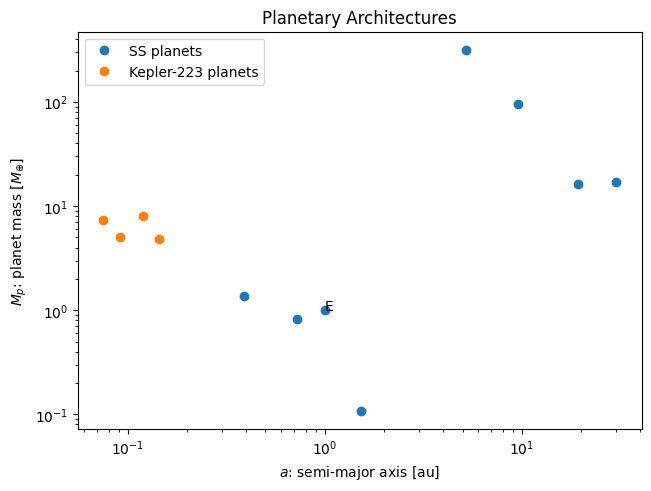

In [16]:
ss_a = np.array([solar[key]['pl_orbsmax'] for key in solar.keys() if key != 'host'])
ss_mass = np.array([solar[key]['pl_bmasse'] for key in solar.keys() if key != 'host'])

exo_a = np.array([exo[key]['pl_orbsmax'] for key in exo.keys() if key != 'host'])
exo_mass = np.array([exo[key]['pl_bmasse'] for key in exo.keys() if key != 'host'])


f,ax = plt.subplots(1,constrained_layout=True)
ax.plot(ss_a,ss_mass,marker='o',lw=0,label='SS planets')

ax.plot(exo_a, exo_mass, marker='o', lw=0, label='Kepler-223 planets')

ax.text(1.0, 1.0, 'E')
ax.legend()
ax.set_xlabel('$a$: semi-major axis [au]')
ax.set_ylabel(r'$M_p$: planet mass [$M_{\oplus}$]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Planetary Architectures')


### b. Habitable Zone

Next, we want to evaluate what these are architectures say about the planet's habitability. We'll use the zero-order marker: the location of the habitable zone, the region for which the planets equilibrium temperature is within the range for water to exist in the liquid phase.

We want to make a plot that shows the equilibrium temperatures for the solar system and the exoplanetary system and overplot the temperature range for the habitable zone. 

> Define a function `T_eq()` which determines the equilibrium temperature as a function of the radial separation and stellar properties. 

> Use the function to calculate and plot the equilibrium temperatures for the planets in the solar system and your chosen exoplanetary system.

> Plot a shaded region in temperature to find the locations of the habitable zone for each planet.



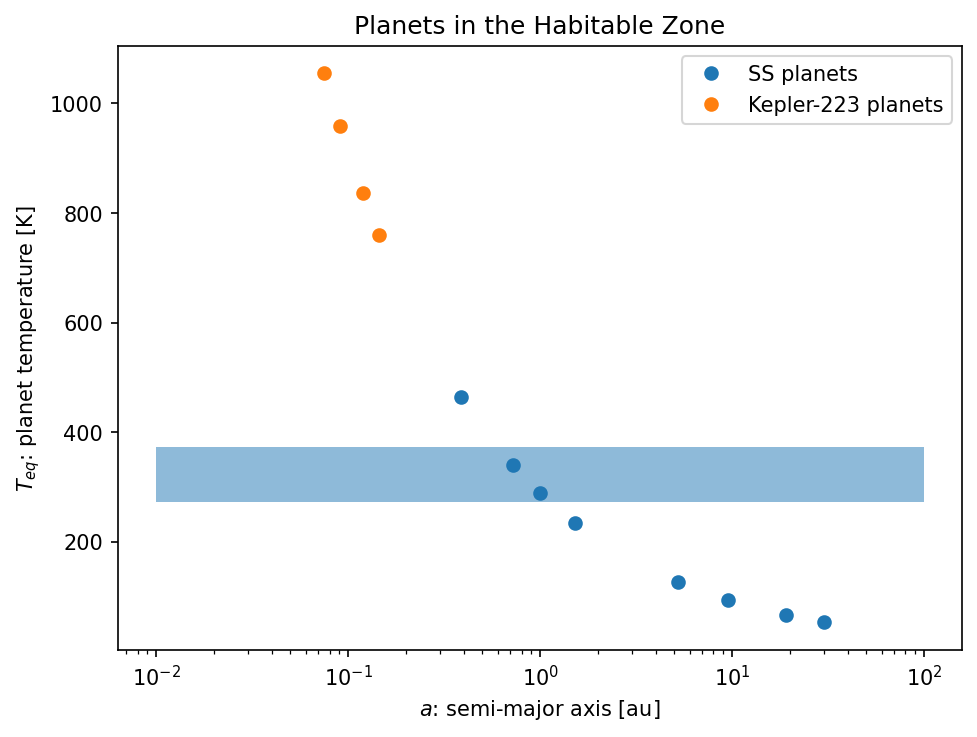

In [17]:
def T_eq(r,Ts,Rs):
    """function to calculate the equilibrium temperature of a planet at distance r in au from a star of temperature Ts with radius Rs in solar radii"""
    R_s = 6.957e+10 # solar radius in cm
    au = 1.496e13 # au in cm
    R_star = Rs * R_s
    r_cm = r * au    
    T_eq = Ts * (R_star / (2.0 * r_cm))**0.5
    return T_eq

ss_a = np.array([solar[key]['pl_orbsmax'] for key in solar.keys() if key != 'host'])


f,ax = plt.subplots(1,constrained_layout=True,dpi=150)
T_sun = solar['host']['st_teff']
R_sun = solar['host']['st_rad']

# plot equilibrium temperatures * HERE* 
ax.plot(ss_a, T_eq(ss_a,Ts=T_sun,Rs=R_sun),label='SS planets',marker='o',lw=0)
ax.plot(exo_a, T_eq(exo_a,Ts=T_sun,Rs=R_sun),label='Kepler-223 planets',marker='o',lw=0)

# plot the habitable zone region * HERE * 
HZ_minT = 273
HZ_maxT = 373
ax.fill_between(np.linspace(0.01,100,100), y1=HZ_minT, y2=HZ_maxT,alpha=0.5)

ax.set_xscale('log')
ax.set_xlabel(r'$a$: semi-major axis [au]')
ax.set_ylabel(r'$T_{eq}$: planet temperature [K]')
ax.set_title('Planets in the Habitable Zone')
ax.legend()

### Questions
> Q1: What is the closest solar system analogue to the planets in your exosystem by mass?

The closest solar system analogues to Kepler-223 planets are uranus and neptune when compared by mass. 

> Q2: How does the architecture of your chosen planetary system compare to the solar system? 
> i.e. the solar system's architecture is described by a system of small terrestrial bodies in the inner regions with more massive gas/ice giants in the outer systems. 

*your answer here*

> Q3: Compare the location of the habitable zone between the two planetary systems, what controls this location?

*your answer here*

> Q4: How many of the solar system's planets are in the habitable zone? How many of your chosen exo-system's are? 

*your answer here*


## Part II: Dynamical Properties

### a. Periodic Behavior

Now let's consider the dynamics of each system. 

> Plot the period vs. semimajor axis relationship for the exoplanet system compared to that of the solar system.

(Again, some of the basic code for the solar system has been provided for you to get you started.)

> Define a function called `Keplerslaw` that determines the predicted period based on orbital properties of the system.

> Use this function to plot the relationship for both the solar system and the exoplanetary system you've chosen.

Your plot should show that Kepler's law applies for the measured planet period and locations for both systems.



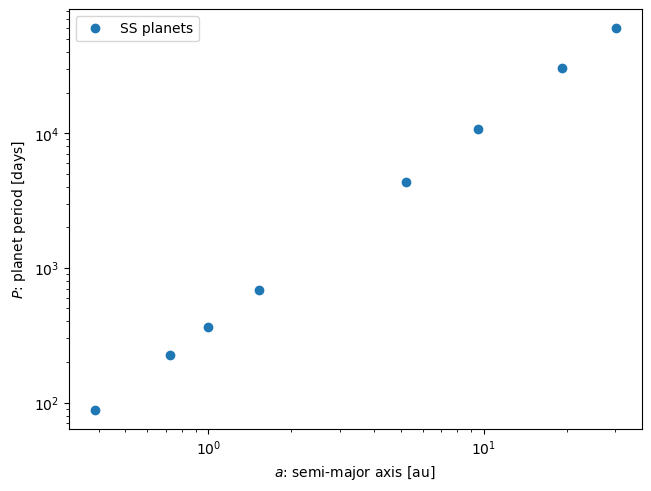

In [6]:
def Keplerslaw(a,Ms):
    """function to return the period in days for a given semimajor axis in au and stellar mass in solar masses"""
    # your function * HERE *
    return 

ss_n = np.array([key for key in solar.keys() if key != 'host'])
ss_a = np.array([solar[key]['pl_orbsmax'] for key in solar.keys() if key != 'host'])
ss_p = np.array([solar[key]['pl_orbper'] for key in solar.keys() if key != 'host'])


f,ax = plt.subplots(1,constrained_layout=True)
ax.plot(ss_a,ss_p,marker='o',lw=0,label='SS planets')

# add Keplers Law lines for solar and exo system *HERE*
# ax.plot(ss_a,Keplerslaw(ss_a,Ms=1), ls='dotted',color='gray')
# ax.plot(..)

# add plot of your system *HERE*
# ax.plot(.. ,marker='.',lw=0,label=exoname)


ax.legend()
ax.set_xlabel(r'$a$: semi-major axis [au]')
ax.set_ylabel(r'$P$: planet period [days]')
ax.set_xscale('log')
ax.set_yscale('log')


                

### b. Resonances
Long-term dynamical stability for systems is complicated, but a common way to enable stable configurations for closely packed systems is for systems to be in Mean Motion Resonance (MMR): see L&dP 2.3.2 for more. 

A system has planets in MMR if their orbits are integer multiples of one another. For ex: if planet `b` can make 3 orbits in the same amount of time that it takes planet `c` to make 2 orbits, then the system is in 3:2 MMR.

Pluto has a 1st order MMR resonance with one of the planets in our solar system. 

> Write a code below to determine which planet and what resonance it is. 

You can use any method you like as long as it demonstrates that the resulting planet has a MMR resonance with pluto.

In [ ]:
p_pluto = 90560 # period of pluto in days

# your code * HERE *




>Expand your MMR finding method to find any 1st order MMRs in your exoplanetary system. 

If there are several, it will be what is known as a *resonant chain.*

In [ ]:
# your code * HERE *


### Questions

> Q1: Write down the MMR you found for Pluto and with which planet it occurs for.

*your answer here*

> Q2: Describe any first order resonances you found for your exoplanetary system.

*your answer here*

> Q3 (bonus): Are there any higher order resonances in the system?

*your answer here*

## Part III. Mass-Radius Relationship
Now we'll be thinking about the bulk structure of the planets. 

> Plot the Mass-Radius relationship for the solar system and the exoplanetary system. 

We want to interpret their positions on the plot in terms of their bulk composition. 

> Define a function `rho_curve` to plot curves of equal density in Mass-Radius space

> Use this function to plot curves for the density of:
> + water
> + silicate rock
> + iron 

> on the M-R plot.

The solar system planets have been included here to get you started.

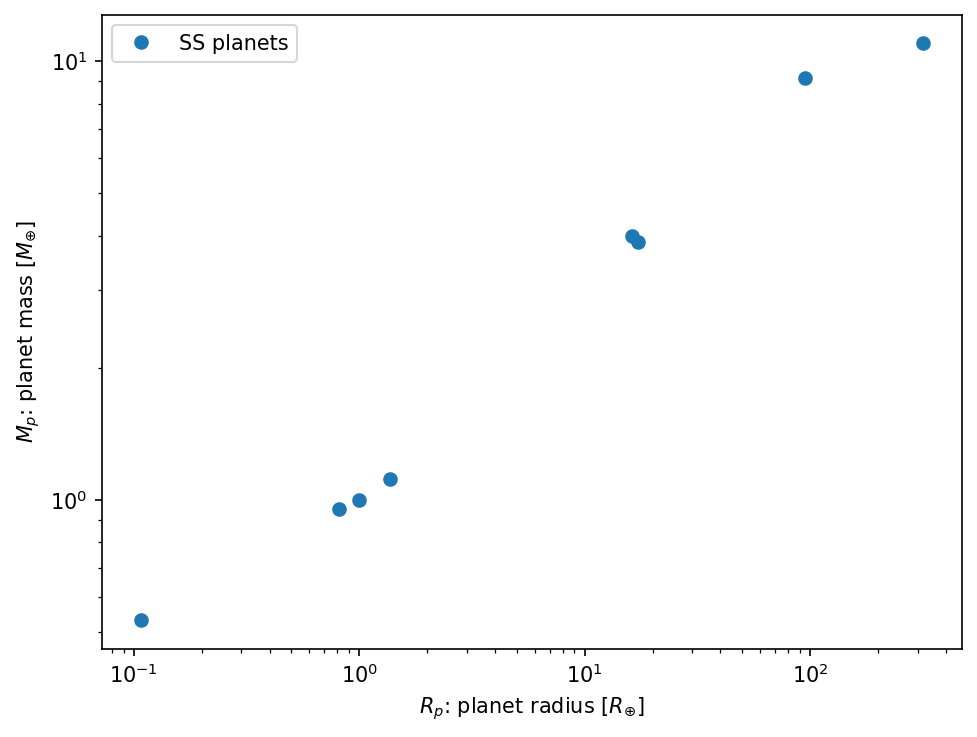

In [7]:
def rho_curve(Mp,rho):
    """function to calculate bulk density curve in M-R space given a planet mass Mp and constant density rho """
    R_e = 6371.0e5 #cm
    M_e = 5.9736e27 #g
    # your function * HERE *
    return 

ss_n = np.array([key for key in solar.keys() if key != 'host'])
ss_R = np.array([solar[key]['pl_rade'] for key in solar.keys() if key != 'host'])
ss_M = np.array([solar[key]['pl_bmasse'] for key in solar.keys() if key != 'host'])


f,ax = plt.subplots(1,constrained_layout=True,dpi=150)

ax.plot(ss_M, ss_R, marker='o',label='SS planets',lw=0)

# plot your exoplanets * HERE *
# ax.plot(..., marker='.',label=exoname,lw=0)

# plot your density curves * HERE *
# ax.plot(ss_M, rho_curve(ss_M,rho=..),label=r'$H_2O$',lw=1,ls='dotted')
# ax.plot(ss_M, rho_curve(ss_M,rho=..),label=r'silicate',lw=1,ls='dashed')
# ax.plot(ss_M, rho_curve(ss_M,rho=..),label=r'$Fe$',lw=1,ls='-.')

ax.set_xlabel(r'$R_p$: planet radius [$R_{\oplus}$]')
ax.set_ylabel(r'$M_p$: planet mass [$M_{\oplus}$]')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')

### Questions
 > Q1: For the solar system, what regions of the plot do the two main types of planets (terrestrial vs. gas giants) occupy? What density regimes do they correspond to?

 *your answer here*

 > Q2: What density regimes does your exoplanetary system occupy? What are the planet's closest analogues in density?

 *your answer here*

 > Q3 (bonus): If you had to choose a hybrid model for a planet with a core of one composition and a mantle of another, what relative proportions of what two compositions could you choose to fit a planet's bulk density? ex. 50% Fe and 50% water. Plot this curve on the plot above. Is this the only combination that could produce that density? Explain.

 *your answer here*

# Project Rubric
Learning Objectives:
+ Use datasets from the NASA exoplanet archive to evaluate the known properties of a multi-planet system.
+ Make comparisons between the solar system and an exoplanetary system in terms of it's architecture, dynamics, and composition.
+ Apply physics principles to the calculation of derived properties. 
+ Use plots to reason about observed data and apply physical principles to the interpretation of results

Projects will be in the range for the following letter grades according to the criteria below: 

**A**: all parts (including responses to the required questions) are fully completed, most major objectives fully achieved and demonstrated

**B**: all parts (including responses to the required questions) are mostly completed, most major objectives at least partially acheived and demonstrated

**C**: part I, part II a and b (including responses to the required questions) are completed w/ major objectives partially achieved and demonstrated. part II c has been attempted so far as to demonstrate some of the major objectives

## Submission format
Your submitted notebook should include all the code and answers to questions that you plan on submitting.

All code to generate your results should be present and run independently from start to finish (i.e. if you click restart kernel, you should be able run each cell in order of appearance and reproduce the cell outputs) 

Prior to submission, save the file with all cells executed and all plots generated.